# Khushi Meena

## Un Supervised ML - Clustering
### Problem statement - Predict the optimum number of clusters and represent it visually.

#### Importing Necessary Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Importing and Reading Data

In [77]:
Iris = pd.read_csv('Iris.csv')

In [78]:
Iris.shape

(150, 6)

In [79]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
Iris.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [81]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [82]:
Iris = Iris.drop(['Id', 'Species'], axis = 1)

In [83]:
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Visualizing the data

In [84]:
#Importing Kmeans from Sklearn libraries
from sklearn.cluster import KMeans

#Initializing empty list
SSE=[]

for cluster in range(1, 20):
    #creating instance of KMeans
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, random_state = 0)
    kmeans.fit(Iris)
        
    #Using Inertia as evaluation metrics for the  custers is 
    #appending inertia to empty list SSE
    
    SSE.append(kmeans.inertia_)

In [85]:
df = pd.DataFrame({'Cluster' : range(1, 20), 'SSE' : SSE})

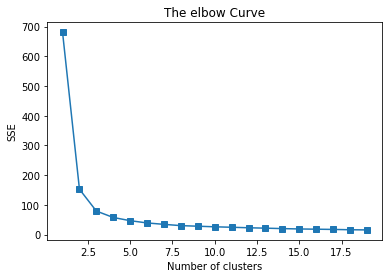

In [86]:
#Plotting Elbow Curve
plt.plot(df['Cluster'], df['SSE'], marker = 's')
plt.title('The elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

### The Number of Clusters Chosen is 3.

In [87]:
kmeans = KMeans(n_clusters = 3)

In [88]:
kmeans.fit(Iris)

KMeans(n_clusters=3)

In [89]:
pred = kmeans.predict(Iris)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [90]:
#The count of observation in each cluster
pd.Series(pred).value_counts()

2    62
0    50
1    38
dtype: int64

In [91]:
#Evaluating our model Prediction
kmeans.inertia_

78.94084142614601

In [92]:
kmeans.score(Iris)

-78.94084142614601

#### Visualising the Clusters

In [93]:
Iris_ = Iris.iloc[:, [0, 1, 2, 3]].values

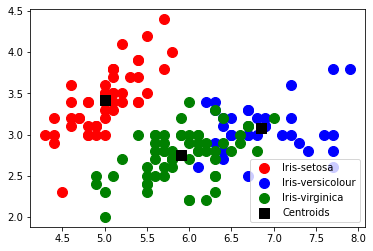

In [94]:
#Cluster 1
plt.scatter(Iris_[pred == 0, 0], Iris_[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
#Cluster 2
plt.scatter(Iris_[pred == 1, 0], Iris_[pred== 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

#Cluster 3
plt.scatter(Iris_[pred == 2, 0], Iris_[pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black',
            label = 'Centroids', marker ='s')

plt.legend()

## The Predicted Optimal Number of Clusters is 3.